In [1]:
# PART III: DATA PREPARATION

# Import any necessary libraries & packages
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Load dataset into pandas data frame
df = pd.read_csv(r'C:\Users\ashle\Downloads\Churn D208\churn_clean.csv',keep_default_na=False)

In [2]:
# Rename the survey columns to describe the variables better
df.rename(columns= {'Item1': 'Responses',
                    'Item2': 'Fixes',
                    'Item3': 'Replacements',
                    'Item4': 'Reliability',
                    'Item5': 'Options',
                    'Item6': 'Respectfulness',
                    'Item7': 'Courteous',
                    'Item8': 'Listening'}, 
          inplace=True)

# Print column names to check corrections made
print(df.columns)

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Responses', 'Fixes', 'Replacements',
       'Reliability', 'Options', 'Respectfulness', 'Courteous', 'Listening'],
      dtype='object')


In [3]:
# Calculate total null values and total duplicate values in the dataset
total_nulls = df.isna().sum().sum()
total_dupes = df.duplicated().sum()

print(f"Total Nulls: {total_nulls}\nTotal Duplicate Records: {total_dupes}")

Total Nulls: 0
Total Duplicate Records: 0


In [4]:
# Check for the number of unique values in each column
df.nunique()

CaseOrder               10000
Customer_id             10000
Interaction             10000
UID                     10000
City                     6058
State                      52
County                   1620
Zip                      8583
Lat                      8563
Lng                      8630
Population               5933
Area                        3
TimeZone                   25
Job                       639
Children                   11
Age                        72
Income                   9993
Marital                     5
Gender                      3
Churn                       2
Outage_sec_perweek       9986
Email                      23
Contacts                    8
Yearly_equip_failure        6
Techie                      2
Contract                    3
Port_modem                  2
Tablet                      2
InternetService             3
Phone                       2
Multiple                    2
OnlineSecurity              2
OnlineBackup                2
DeviceProt

In [5]:
# Print the columns with less than 100 unique values
for col in df.columns:
    if df[col].nunique()<100:
        print(col, sorted(df[col].unique()), '\n')

State ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'] 

Area ['Rural', 'Suburban', 'Urban'] 

TimeZone ['America/Anchorage', 'America/Boise', 'America/Chicago', 'America/Denver', 'America/Detroit', 'America/Indiana/Indianapolis', 'America/Indiana/Knox', 'America/Indiana/Marengo', 'America/Indiana/Petersburg', 'America/Indiana/Tell_City', 'America/Indiana/Vincennes', 'America/Indiana/Winamac', 'America/Juneau', 'America/Kentucky/Louisville', 'America/Los_Angeles', 'America/Menominee', 'America/New_York', 'America/Nome', 'America/North_Dakota/New_Salem', 'America/Ojinaga', 'America/Phoenix', 'America/Puerto_Rico', 'America/Sitka', 'America/Toronto', 'Pacific/Honolulu'] 

Children [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 

Age [18, 19

In [6]:
# Drop columns that are unnecessary for the analysis
to_drop = ['CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip',
           'Lat','Lng','Population','Area','TimeZone','Job','Age','Marital','Gender','PaperlessBilling',
           'PaymentMethod']
df.drop(columns=to_drop,inplace=True)

df.head()

,Children,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,...,MonthlyCharge,Bandwidth_GB_Year,Responses,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
0,0,28561.99,No,7.978323,10,0,1,No,One year,Yes,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,1,21704.77,Yes,11.699080,12,0,1,Yes,Month-to-month,No,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,4,9609.57,No,10.752800,9,0,1,Yes,Two Year,Yes,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,1,18925.23,No,14.913540,15,2,0,Yes,Two Year,No,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,0,40074.19,Yes,8.147417,16,2,1,No,Month-to-month,Yes,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [7]:
# Find the summary statistics for numerical variables
df.describe()

,Children,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Responses,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2.1472,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.0000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.0000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.0000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,3.0000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10.0000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [8]:
# Create a list of the categorical variables
cat_cols = ['Churn','Techie','Contract','Port_modem','Tablet',
            'InternetService','Phone','Multiple','OnlineSecurity','OnlineBackup',
            'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
            
print('PROPORTION OF EACH CATEGORICAL VARIABLE')
for col in cat_cols:
    freq = df[col].value_counts(normalize=True).reset_index()
    freq.columns = [f'{col}','Proportion']
    print('-'*40+'\n',freq)

PROPORTION OF EACH CATEGORICAL VARIABLE
----------------------------------------
   Churn  Proportion
0    No       0.735
1   Yes       0.265
----------------------------------------
   Techie  Proportion
0     No      0.8321
1    Yes      0.1679
----------------------------------------
          Contract  Proportion
0  Month-to-month      0.5456
1        Two Year      0.2442
2        One year      0.2102
----------------------------------------
   Port_modem  Proportion
0         No      0.5166
1        Yes      0.4834
----------------------------------------
   Tablet  Proportion
0     No      0.7009
1    Yes      0.2991
----------------------------------------
   InternetService  Proportion
0     Fiber Optic      0.4408
1             DSL      0.3463
2            None      0.2129
----------------------------------------
   Phone  Proportion
0   Yes      0.9067
1    No      0.0933
----------------------------------------
   Multiple  Proportion
0       No      0.5392
1      Yes      0

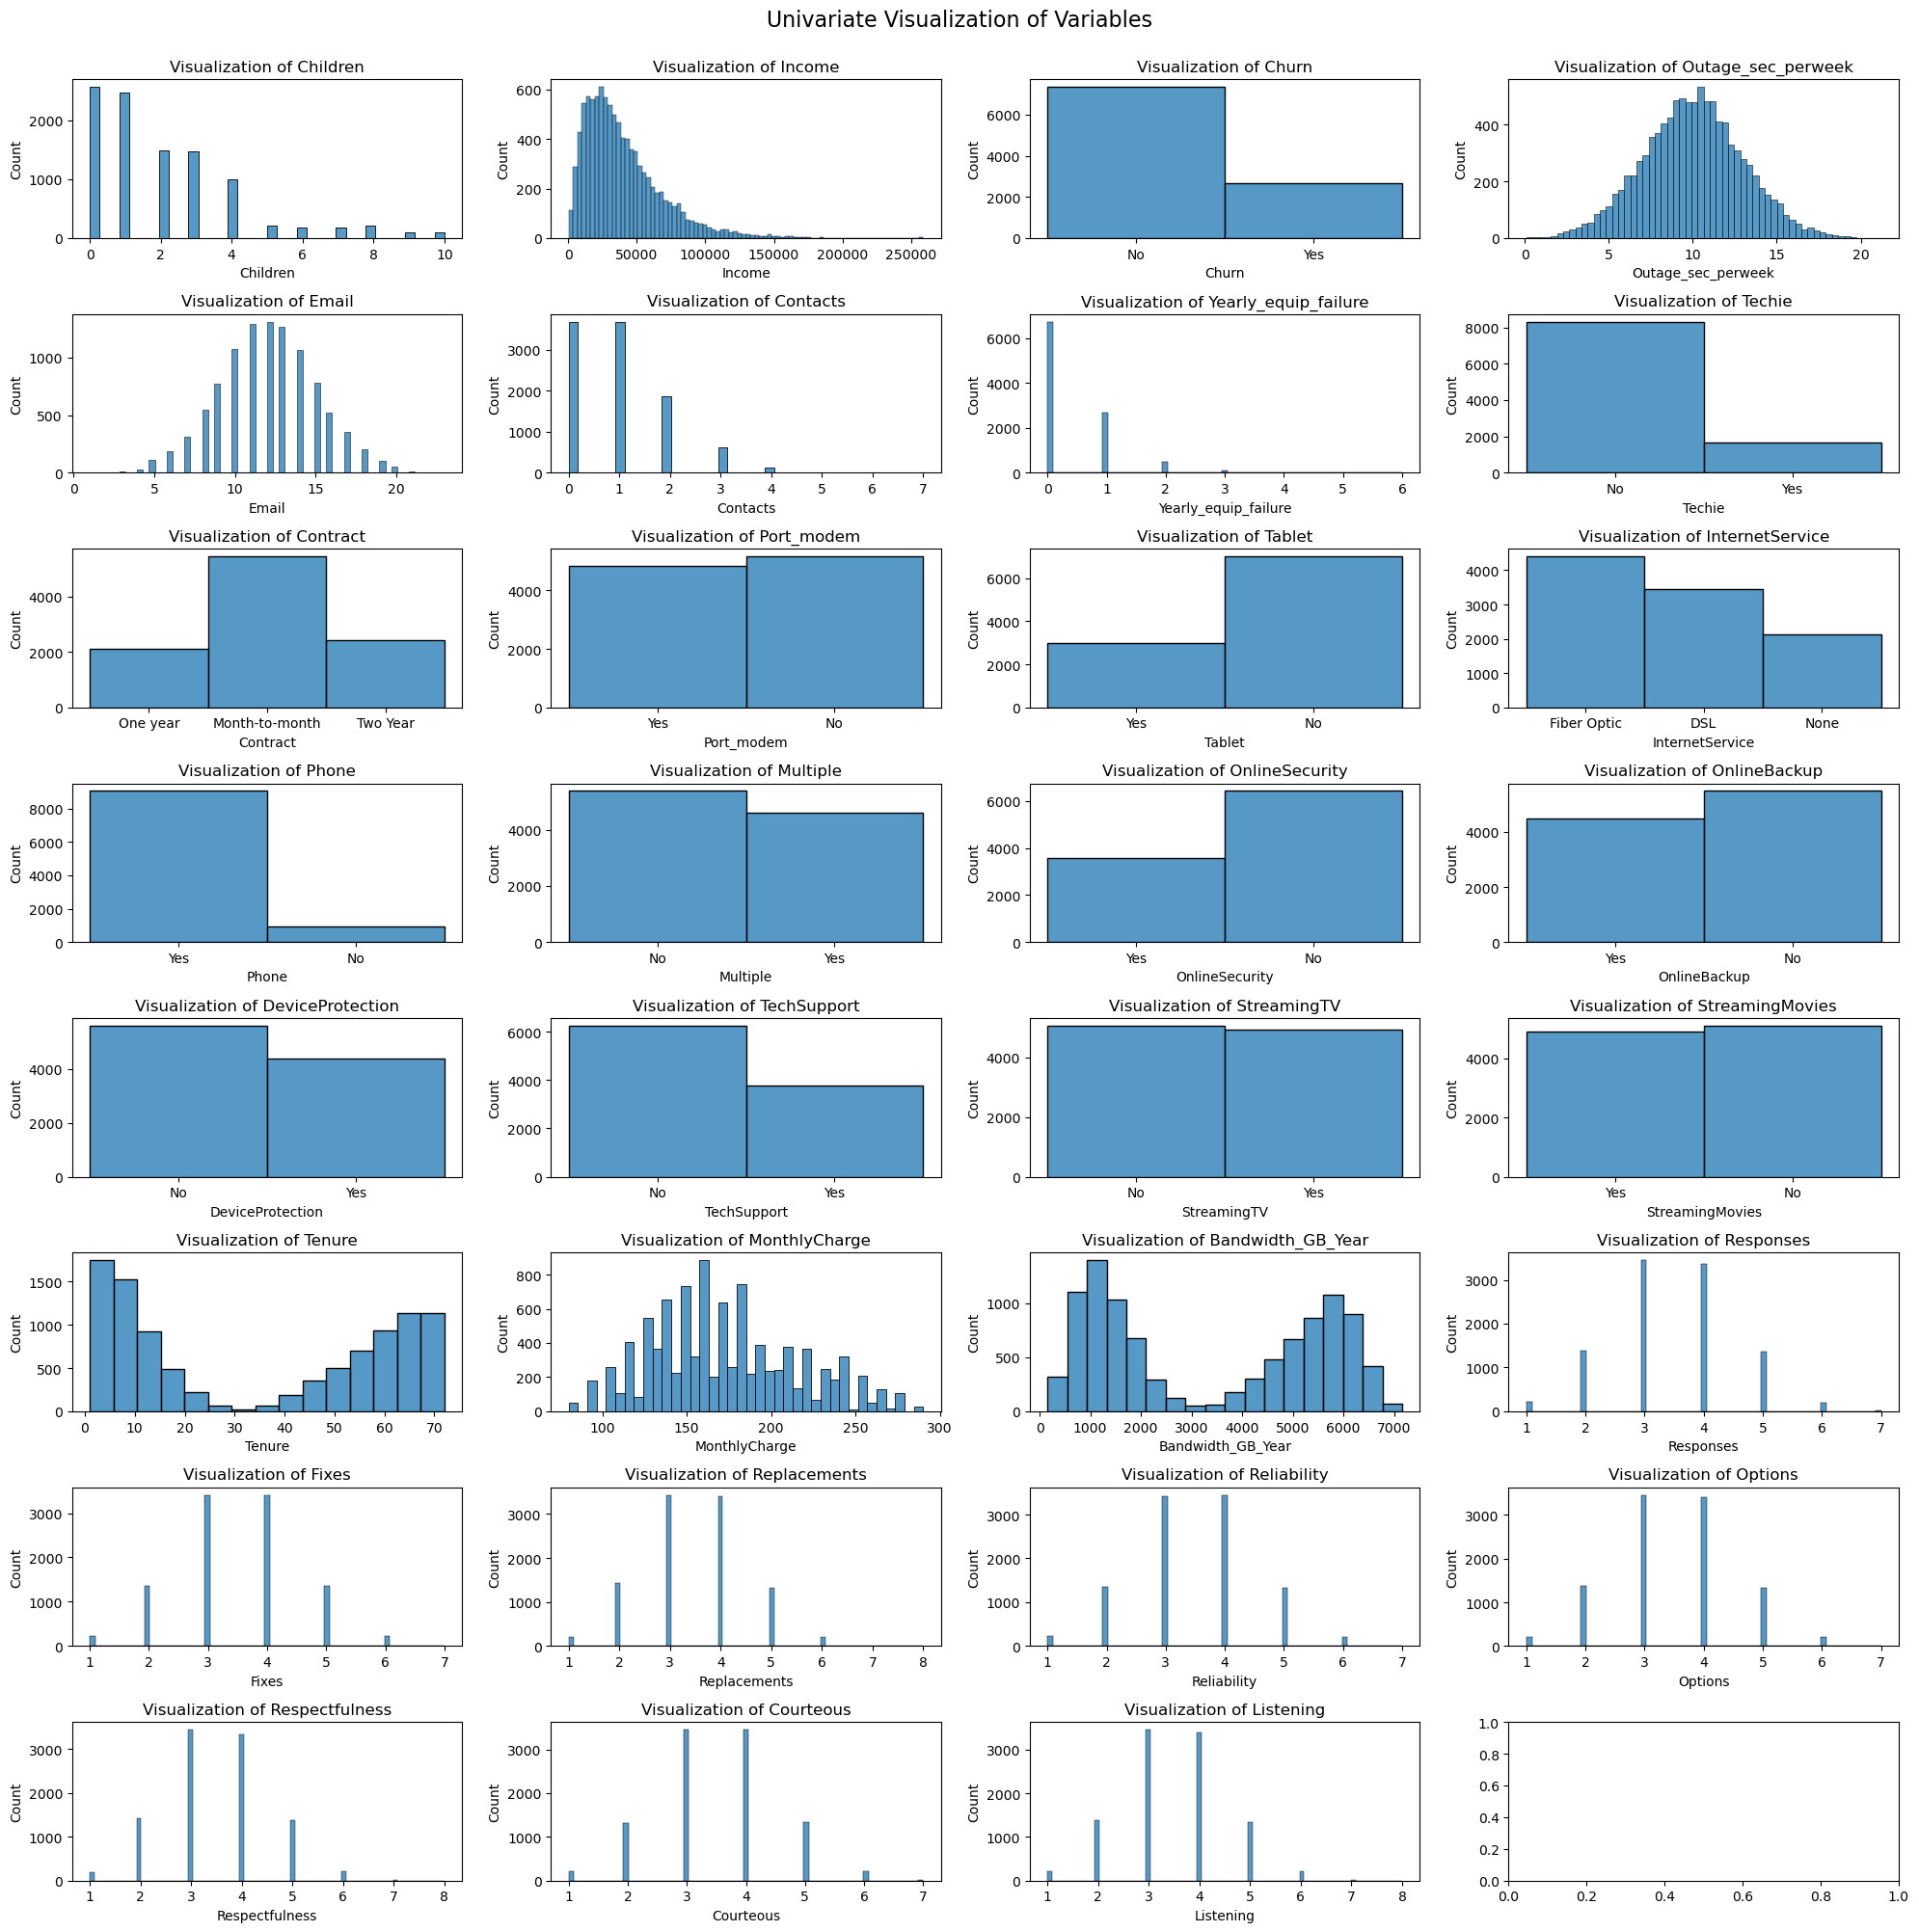

In [9]:
# UNIVARIATE VISUALIZATIONS
# Display the univariate visualization for all independent (predicting) variables and dependent (target) variable
fig_rows, fig_cols = (8, 4)
fig, axes = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=(20, 20))
i = 0
for row in range(fig_rows):
    for col in range(fig_cols):
        try:
            sns.histplot(data=df, x=df.columns[i], ax=axes[row][col])
            axes[row][col].set_title(f"Visualization of {df.columns[i]}")
            i += 1
        except IndexError:
            break
plt.suptitle("Univariate Visualization of Variables", fontsize=16, y=1)
plt.tight_layout()
plt.show()

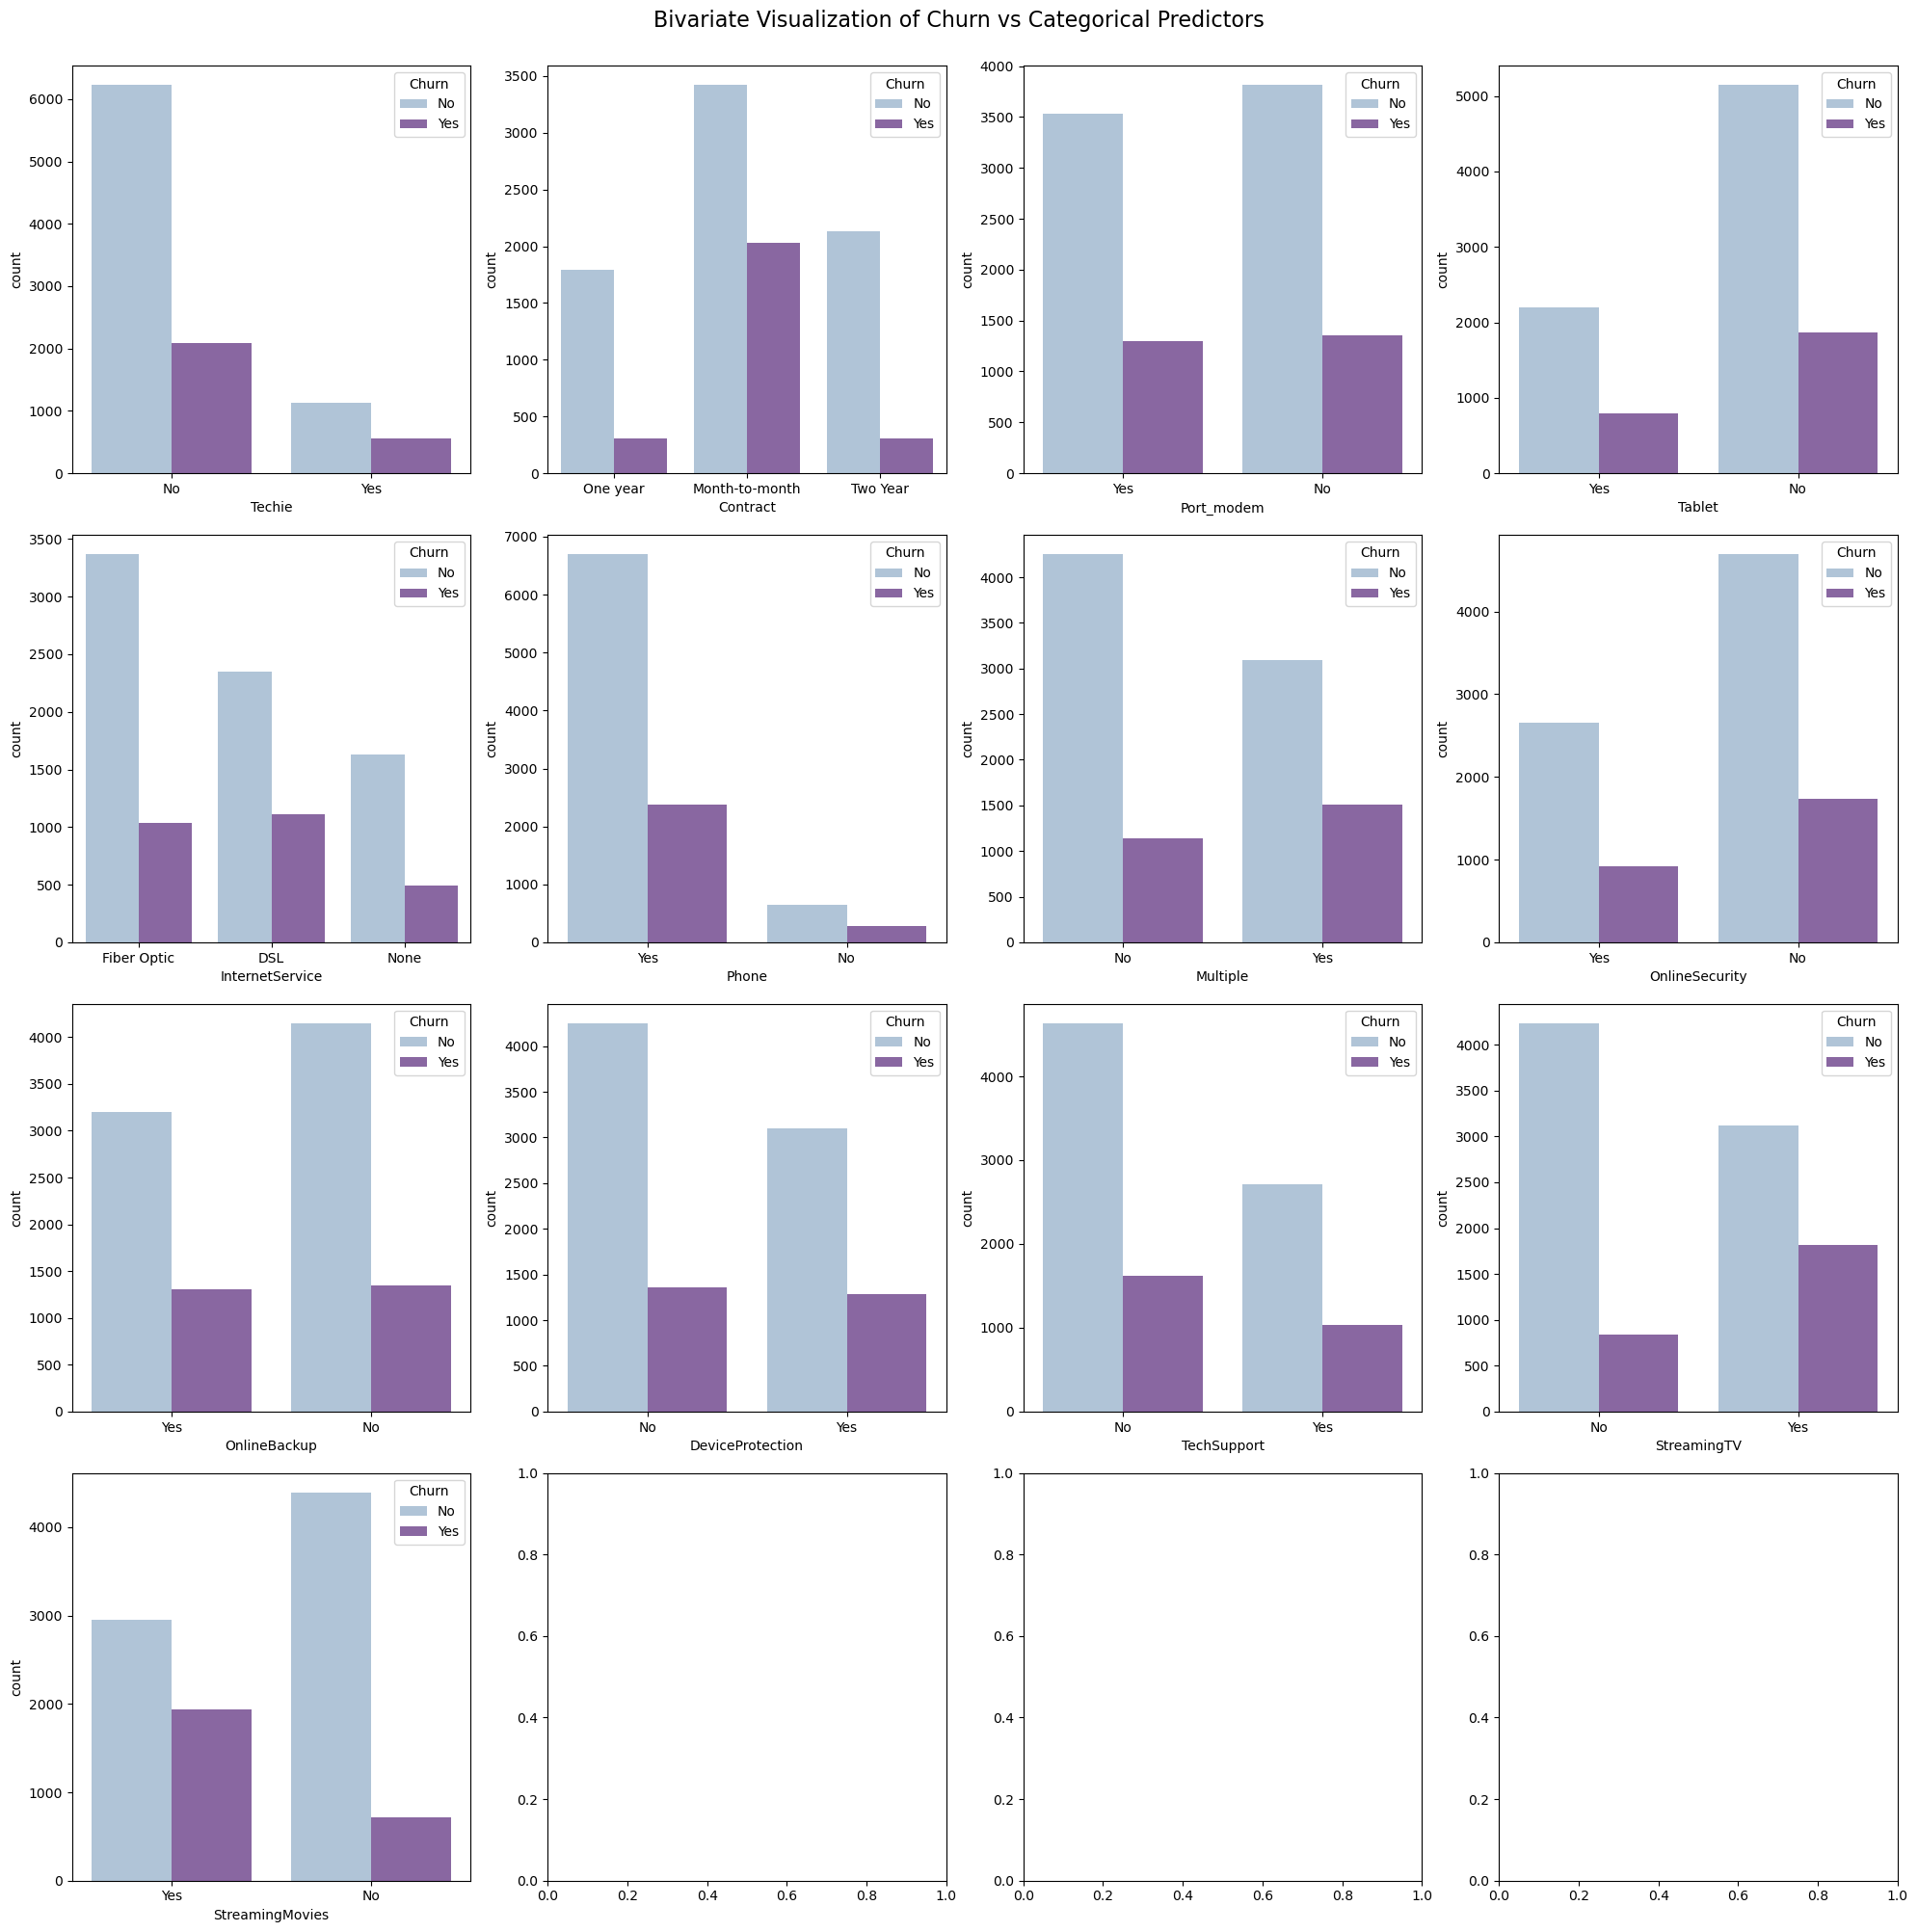

In [10]:
# BIVARIATE VISUALIZATIONS

# Create a dataframe of categorical columns (without Churn)
cat_vars = df[['Techie','Contract','Port_modem','Tablet','InternetService','Phone',
             'Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
             'StreamingTV','StreamingMovies']]

# Create a count plot for categorical predictors vs the target variable
fig, ax = plt.subplots(4,4,figsize = (20,20))    
for i , subplots in zip (cat_vars, ax.flatten()):
        sns.countplot(x= cat_vars[i],hue = df['Churn'],ax = subplots, palette = 'BuPu')
plt.suptitle("Bivariate Visualization of Churn vs Categorical Predictors", fontsize=16, y=1)
plt.tight_layout()
plt.show()

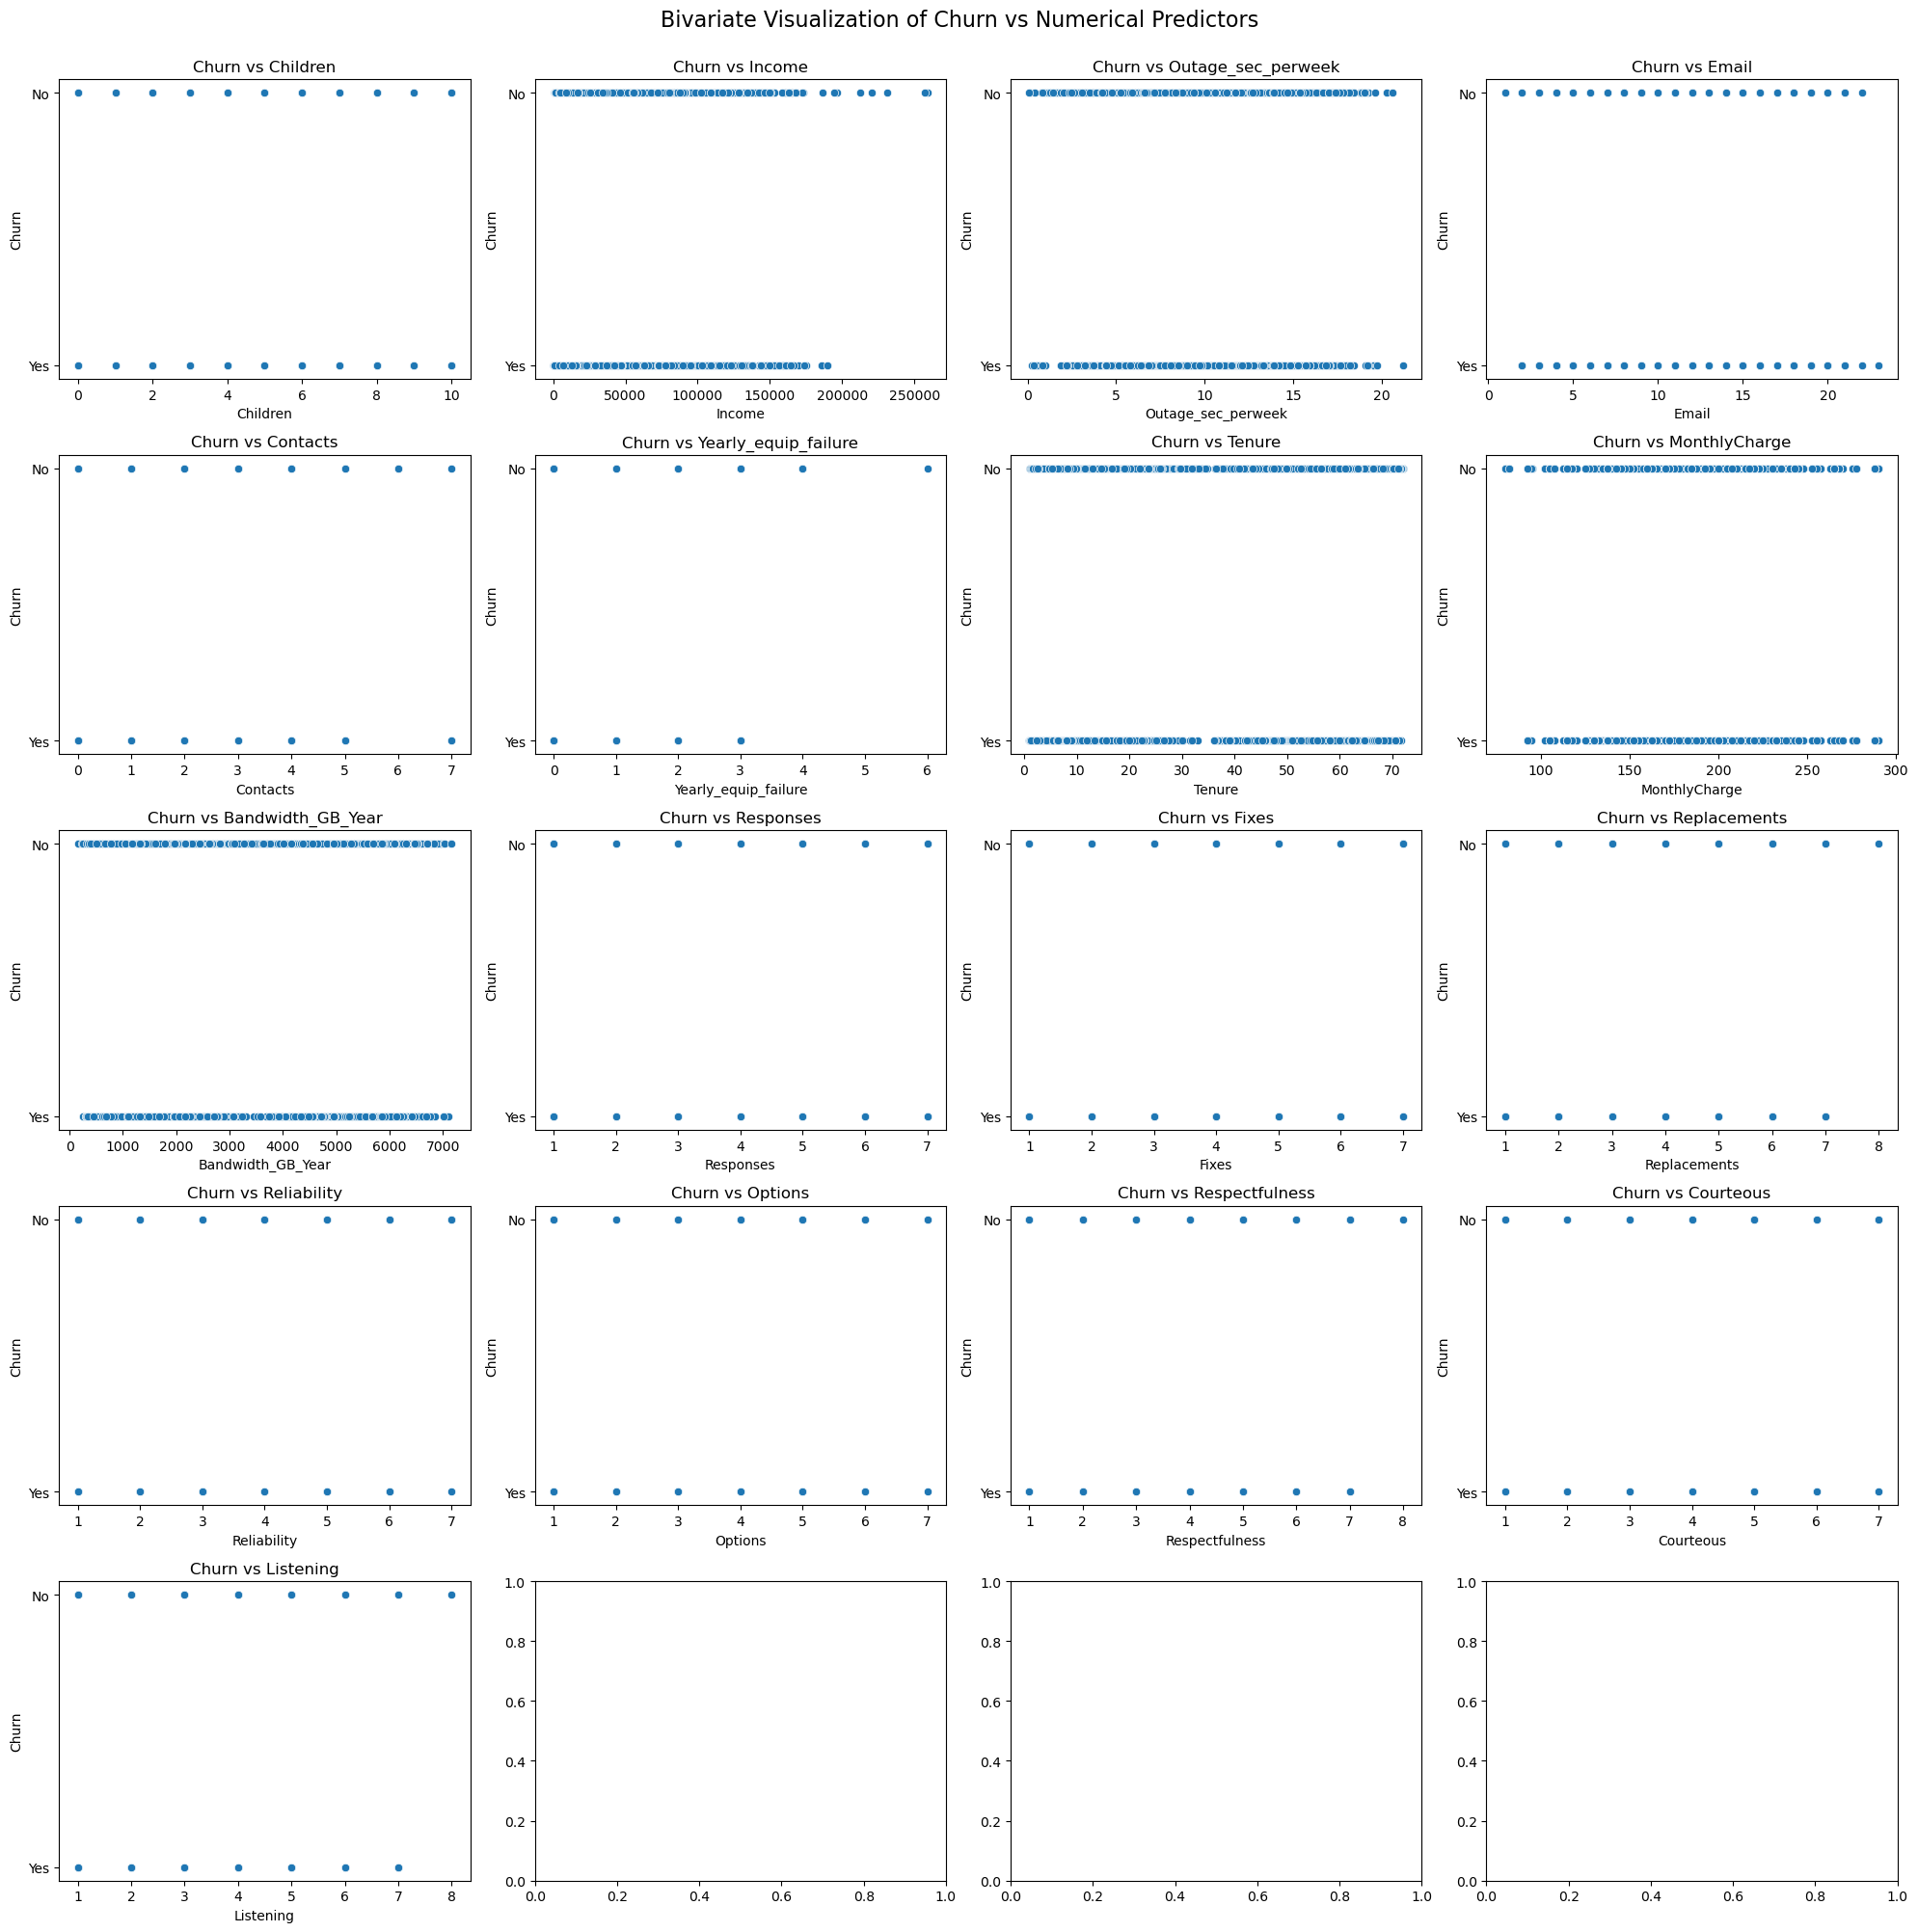

In [11]:
# BIVARIATE VISUALIZATIONS

# Create a dataframe of numerical columns
num_vars = df[['Children','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure','MonthlyCharge', 
               'Bandwidth_GB_Year','Responses','Fixes','Replacements','Reliability','Options','Respectfulness','Courteous', 
               'Listening']]

# Create a scatter plot for numerical predictors vs the target variable
fig_rows, fig_cols = (5, 4)
fig, axes = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=(20, 20))
cols = list(filter(lambda x: x != "Churn", num_vars.columns))
i = 0
for row in range(fig_rows):
    for col in range(fig_cols):
        try:
            sns.scatterplot(data= df, x= cols[i], y="Churn", ax=axes[row][col])
            axes[row][col].set_title(f"Churn vs {cols[i]}")
            i += 1
        except IndexError:
            break

plt.suptitle("Bivariate Visualization of Churn vs Numerical Predictors", fontsize=16, y=1)
plt.tight_layout()
plt.show()

In [12]:
# Reformat the columns to have 3 decimal places
df['Outage_sec_perweek'] = df.Outage_sec_perweek.round(3)
df['MonthlyCharge'] = df.MonthlyCharge.round(3)
df['Bandwidth_GB_Year'] = df.Bandwidth_GB_Year.round(3)
df['Tenure'] = df.Tenure.round(3)

# Create dummy variables where "Yes" is represented by 1 & "No" is represented by 0
df['DummyChurn'] = [1 if v == 'Yes' else 0 for v in df['Churn']]
df['DummyTechie'] = [1 if v == 'Yes' else 0 for v in df['Techie']]
df['DummyContract'] = [1 if v == 'Two Year' else 0 for v in df['Contract']]
df['DummyPort_modem'] = [1 if v == 'Yes' else 0 for v in df['Port_modem']]
df['DummyTablet'] = [1 if v == 'Yes' else 0 for v in df['Tablet']]
df['DummyInternetService'] = [1 if v == 'Fiber Optic' else 0 for v in df['InternetService']]
df['DummyPhone'] = [1 if v == 'Yes' else 0 for v in df['Phone']]
df['DummyMultiple'] = [1 if v == 'Yes' else 0 for v in df['Multiple']]
df['DummyOnlineSecurity'] = [1 if v == 'Yes' else 0 for v in df['OnlineSecurity']]
df['DummyOnlineBackup'] = [1 if v == 'Yes' else 0 for v in df['OnlineBackup']]
df['DummyDeviceProtection'] = [1 if v == 'Yes' else 0 for v in df['DeviceProtection']]
df['DummyTechSupport'] = [1 if v == 'Yes' else 0 for v in df['TechSupport']]
df['DummyStreamingTV'] = [1 if v == 'Yes' else 0 for v in df['StreamingTV']]
df['DummyStreamingMovies'] = [1 if v == 'Yes' else 0 for v in df['StreamingMovies']]

In [13]:
# Drop the original categorical columns
df = df.drop(columns=['Churn','Techie','Contract','Port_modem','Tablet','InternetService','Phone','Multiple',
                      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'])

# Check the new data frame
df

,Children,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Responses,...,DummyTablet,DummyInternetService,DummyPhone,DummyMultiple,DummyOnlineSecurity,DummyOnlineBackup,DummyDeviceProtection,DummyTechSupport,DummyStreamingTV,DummyStreamingMovies
0,0,28561.99,7.978,10,0,1,6.796,172.456,904.536,5,...,1,1,1,0,1,1,0,0,0,1
1,1,21704.77,11.699,12,0,1,1.157,242.633,800.983,3,...,1,1,1,1,1,0,0,0,1,1
2,4,9609.57,10.753,9,0,1,15.754,159.948,2054.707,4,...,0,0,1,1,0,0,0,0,0,1
3,1,18925.23,14.914,15,2,0,17.087,119.957,2164.579,4,...,0,0,1,0,1,0,0,0,1,0
4,0,40074.19,8.147,16,2,1,1.671,149.948,271.493,4,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,55723.74,9.416,12,2,0,68.197,159.979,6511.253,3,...,1,0,1,1,0,1,1,0,0,0
9996,4,34129.34,6.741,15,2,0,61.040,207.481,5695.952,4,...,0,1,1,1,1,1,1,0,1,0
9997,1,45983.43,6.591,10,0,0,47.417,169.974,4159.306,4,...,0,1,1,1,1,1,0,0,0,0
9998,1,16667.58,12.072,14,1,0,71.096,252.624,6468.457,4,...,1,1,0,1,0,0,0,1,1,1


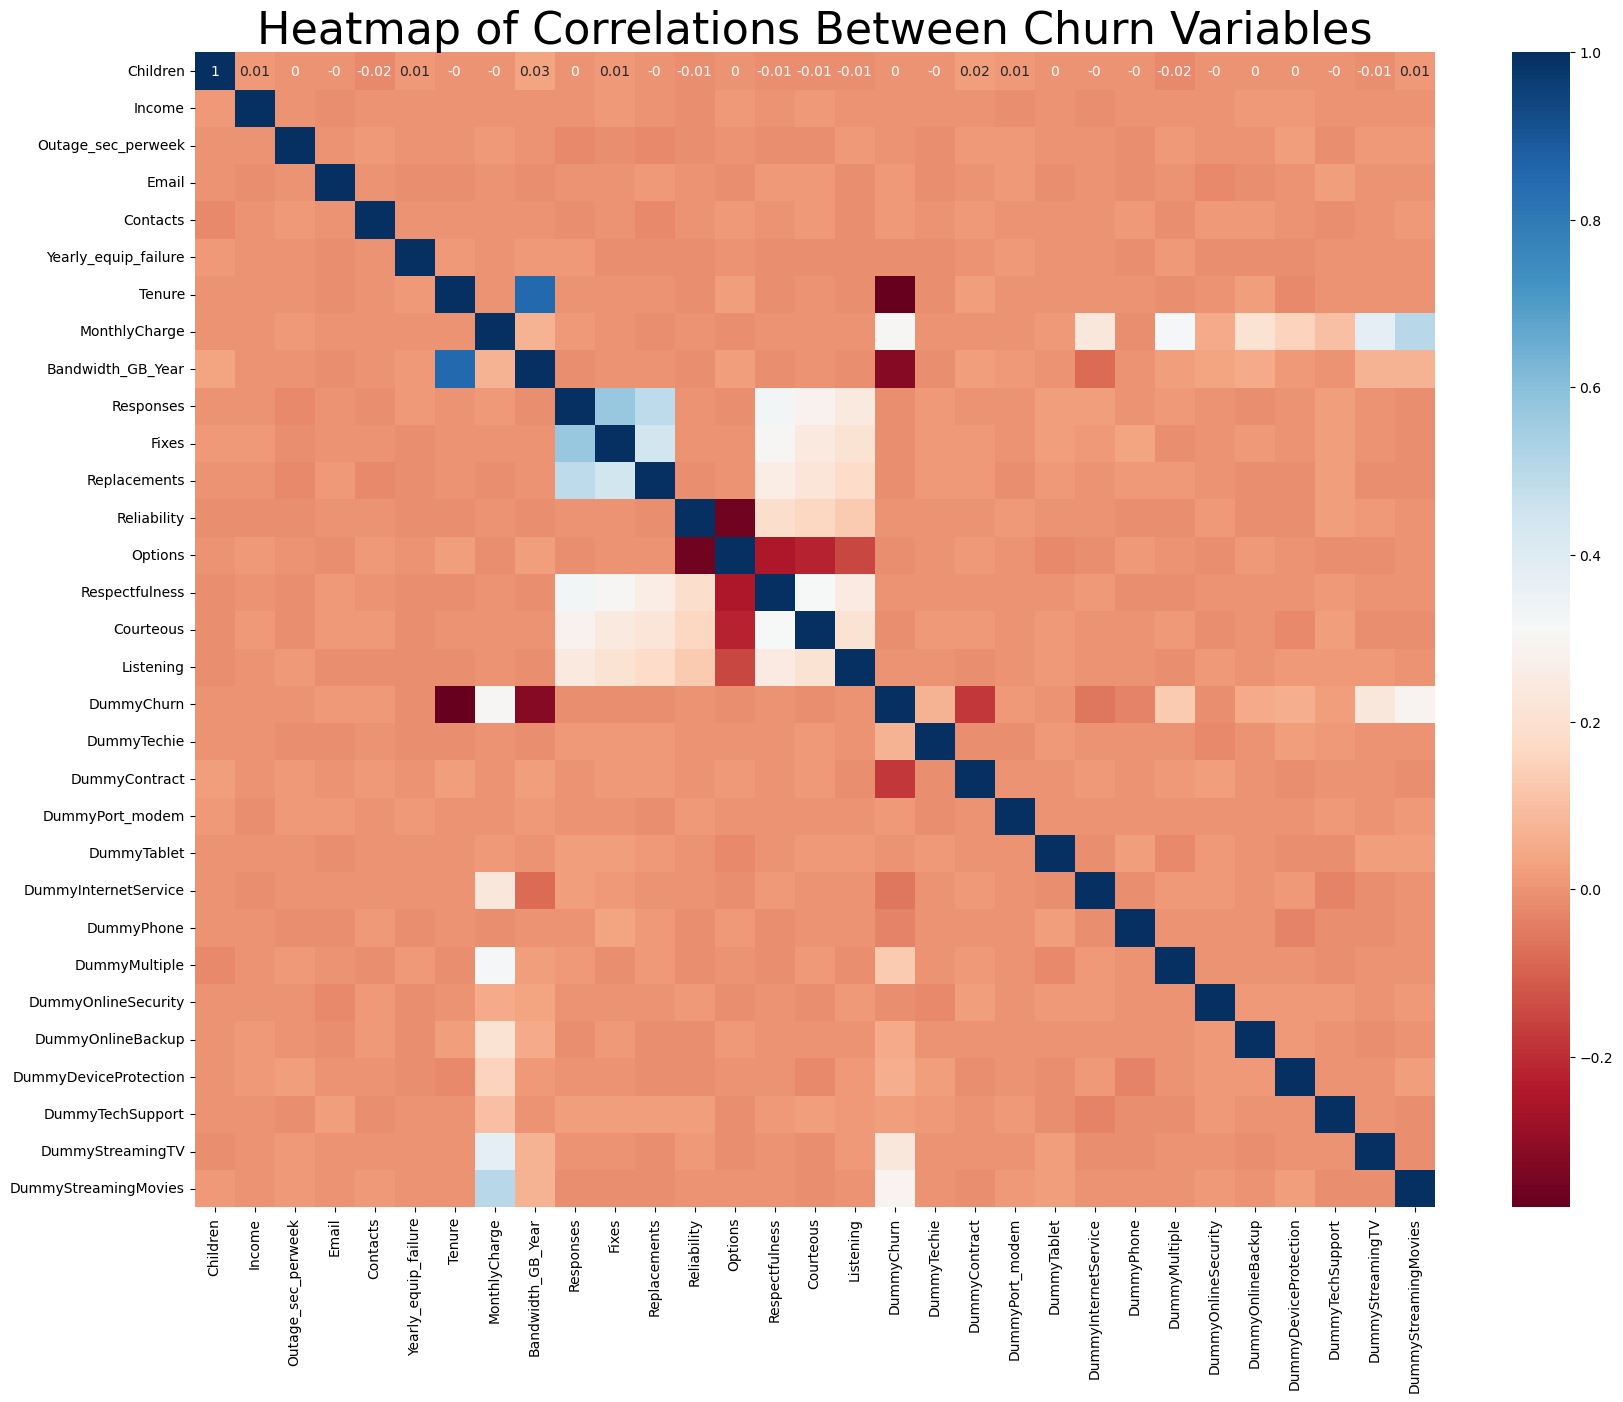

In [14]:
# Create a heatmap to check for multicollinearity
corrs = df.corr(method="kendall").round(2)
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corrs, annot=True, ax=ax, cmap='RdBu')
plt.title("Heatmap of Correlations Between Churn Variables",fontsize=32)
plt.show()

In [15]:
# Extract the cleaned & wrangled dataset
df.to_csv('log_clean.csv', index=False)

In [16]:
# PART IV: INITIAL LOGISTIC REGRESSION MODEL

# Load dataset into pandas data frame
df = pd.read_csv(r'C:\Users\ashle\Downloads\Churn D208\log_clean.csv',keep_default_na=False)

In [17]:
# Set the dependent variable
y = df.DummyChurn

# Set the multiple independent variables
X = df[['Children','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure','MonthlyCharge',
        'Bandwidth_GB_Year','Responses','Fixes','Replacements','Reliability','Options','Respectfulness','Courteous',
        'Listening','DummyTechie','DummyContract','DummyPort_modem','DummyTablet','DummyInternetService','DummyPhone',
        'DummyMultiple','DummyOnlineSecurity','DummyOnlineBackup','DummyDeviceProtection','DummyTechSupport',
        'DummyStreamingTV','DummyStreamingMovies']].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.272221
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             DummyChurn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9969
Method:                           MLE   Df Model:                           30
Date:                Fri, 28 Jun 2024   Pseudo R-squ.:                  0.5292
Time:                        22:13:18   Log-Likelihood:                -2722.2
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Children                 -0.0362      0.018     -2.057      0.040      -0.071      -0.

In [18]:
# BEGINNING MODEL REDUCTION: VARIANCE INFLATION FACTOR

# Check VIF to see which variables should be eliminated due to high multicollinearity (greater than 10)
X = df[['Children','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure','MonthlyCharge',
        'Bandwidth_GB_Year','Responses','Fixes','Replacements','Reliability','Options','Respectfulness','Courteous',
        'Listening','DummyTechie','DummyContract','DummyPort_modem','DummyTablet','DummyInternetService','DummyPhone',
        'DummyMultiple','DummyOnlineSecurity','DummyOnlineBackup','DummyDeviceProtection','DummyTechSupport',
        'DummyStreamingTV','DummyStreamingMovies']]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                  feature         VIF
0                Children    2.313154
1                  Income    2.973378
2      Outage_sec_perweek   11.571891
3                   Email   15.464404
4                Contacts    2.008217
5    Yearly_equip_failure    1.389662
6                  Tenure  585.081025
7           MonthlyCharge  291.098538
8       Bandwidth_GB_Year  748.971837
9               Responses   27.281816
10                  Fixes   24.131171
11           Replacements   19.910410
12            Reliability   14.297285
13                Options   13.878320
14         Respectfulness   18.145830
15              Courteous   16.238660
16              Listening   14.607153
17            DummyTechie    1.203774
18          DummyContract    1.325568
19        DummyPort_modem    1.929724
20            DummyTablet    1.428661
21   DummyInternetService    7.755444
22             DummyPhone   10.186418
23          DummyMultiple    6.040141
24    DummyOnlineSecurity    1.644977
25      Dumm

In [19]:
# Run the model after the removal of "Bandwidth_GB_Year" since it had the highest VIF (748.97)
X = df[['Children','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure','MonthlyCharge',
        'Responses','Fixes','Replacements','Reliability','Options','Respectfulness','Courteous',
        'Listening','DummyTechie','DummyContract','DummyPort_modem','DummyTablet','DummyInternetService','DummyPhone',
        'DummyMultiple','DummyOnlineSecurity','DummyOnlineBackup','DummyDeviceProtection','DummyTechSupport',
        'DummyStreamingTV','DummyStreamingMovies']]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                  feature         VIF
0                Children    1.938545
1                  Income    2.971581
2      Outage_sec_perweek   11.523976
3                   Email   15.391479
4                Contacts    2.008076
5    Yearly_equip_failure    1.389456
6                  Tenure    2.692744
7           MonthlyCharge  214.278564
8               Responses   27.281651
9                   Fixes   24.129639
10           Replacements   19.892730
11            Reliability   14.145517
12                Options   13.674432
13         Respectfulness   18.134204
14              Courteous   16.218195
15              Listening   14.599313
16            DummyTechie    1.203707
17          DummyContract    1.325521
18        DummyPort_modem    1.929402
19            DummyTablet    1.428479
20   DummyInternetService    3.791015
21             DummyPhone   10.148260
22          DummyMultiple    5.467850
23    DummyOnlineSecurity    1.589592
24      DummyOnlineBackup    3.528013
25  DummyDev

In [20]:
# Run the model after the removal of "MonthlyCharge" since it had the highest VIF (214.28)
X = df[['Children','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure',
        'Responses','Fixes','Replacements','Reliability','Options','Respectfulness','Courteous',
        'Listening','DummyTechie','DummyContract','DummyPort_modem','DummyTablet','DummyInternetService','DummyPhone',
        'DummyMultiple','DummyOnlineSecurity','DummyOnlineBackup','DummyDeviceProtection','DummyTechSupport',
        'DummyStreamingTV','DummyStreamingMovies']]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                  feature        VIF
0                Children   1.933000
1                  Income   2.948470
2      Outage_sec_perweek  11.172688
3                   Email  14.685446
4                Contacts   2.002669
5    Yearly_equip_failure   1.387632
6                  Tenure   2.680809
7               Responses  27.277017
8                   Fixes  24.091451
9            Replacements  19.838308
10            Reliability  13.120696
11                Options  11.726525
12         Respectfulness  17.988471
13              Courteous  16.022656
14              Listening  14.418486
15            DummyTechie   1.201591
16          DummyContract   1.324715
17        DummyPort_modem   1.927283
18            DummyTablet   1.427568
19   DummyInternetService   1.780151
20             DummyPhone   9.926094
21          DummyMultiple   1.845612
22    DummyOnlineSecurity   1.553307
23      DummyOnlineBackup   1.811071
24  DummyDeviceProtection   1.777510
25       DummyTechSupport   1.600371
2

In [21]:
# Run the model after the removal of "Responses" since it had the highest VIF (27.28)
X = df[['Children','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure',
        'Fixes','Replacements','Reliability','Options','Respectfulness','Courteous','Listening','DummyTechie',
        'DummyContract','DummyPort_modem','DummyTablet','DummyInternetService','DummyPhone','DummyMultiple',
        'DummyOnlineSecurity','DummyOnlineBackup','DummyDeviceProtection','DummyTechSupport','DummyStreamingTV',
        'DummyStreamingMovies']]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                  feature        VIF
0                Children   1.932905
1                  Income   2.947699
2      Outage_sec_perweek  11.168061
3                   Email  14.684735
4                Contacts   2.002665
5    Yearly_equip_failure   1.386890
6                  Tenure   2.680461
7                   Fixes  19.075568
8            Replacements  17.771779
9             Reliability  13.079546
10                Options  11.633512
11         Respectfulness  17.537578
12              Courteous  15.801157
13              Listening  14.246278
14            DummyTechie   1.201560
15          DummyContract   1.324699
16        DummyPort_modem   1.927282
17            DummyTablet   1.427128
18   DummyInternetService   1.778683
19             DummyPhone   9.920236
20          DummyMultiple   1.844866
21    DummyOnlineSecurity   1.553305
22      DummyOnlineBackup   1.810825
23  DummyDeviceProtection   1.777498
24       DummyTechSupport   1.599795
25       DummyStreamingTV   1.957881
2

In [22]:
# Run the model after the removal of "Fixes" since it had the highest VIF (19.08)
X = df[['Children','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure',
        'Replacements','Reliability','Options','Respectfulness','Courteous','Listening','DummyTechie',
        'DummyContract','DummyPort_modem','DummyTablet','DummyInternetService','DummyPhone','DummyMultiple',
        'DummyOnlineSecurity','DummyOnlineBackup','DummyDeviceProtection','DummyTechSupport','DummyStreamingTV',
        'DummyStreamingMovies']]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                  feature        VIF
0                Children   1.932336
1                  Income   2.947451
2      Outage_sec_perweek  11.164819
3                   Email  14.684634
4                Contacts   2.002450
5    Yearly_equip_failure   1.386884
6                  Tenure   2.680332
7            Replacements  14.605942
8             Reliability  13.061007
9                 Options  11.391898
10         Respectfulness  16.772332
11              Courteous  15.457774
12              Listening  14.038633
13            DummyTechie   1.201482
14          DummyContract   1.324693
15        DummyPort_modem   1.927150
16            DummyTablet   1.426505
17   DummyInternetService   1.778266
18             DummyPhone   9.903989
19          DummyMultiple   1.844416
20    DummyOnlineSecurity   1.553274
21      DummyOnlineBackup   1.810352
22  DummyDeviceProtection   1.777061
23       DummyTechSupport   1.599635
24       DummyStreamingTV   1.957629
25   DummyStreamingMovies   1.947997


In [23]:
# Run the model after the removal of "Respectfulness" since it had the highest VIF (16.77)
X = df[['Children','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure',
        'Replacements','Reliability','Options','Courteous','Listening','DummyTechie','DummyContract',
        'DummyPort_modem','DummyTablet','DummyInternetService','DummyPhone','DummyMultiple','DummyOnlineSecurity',
        'DummyOnlineBackup','DummyDeviceProtection','DummyTechSupport','DummyStreamingTV','DummyStreamingMovies']]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                  feature        VIF
0                Children   1.931778
1                  Income   2.945404
2      Outage_sec_perweek  11.140974
3                   Email  14.599119
4                Contacts   2.001564
5    Yearly_equip_failure   1.386516
6                  Tenure   2.679689
7            Replacements  13.514471
8             Reliability  12.579459
9                 Options  11.274893
10              Courteous  14.356491
11              Listening  13.412190
12            DummyTechie   1.201394
13          DummyContract   1.324669
14        DummyPort_modem   1.926723
15            DummyTablet   1.426501
16   DummyInternetService   1.777167
17             DummyPhone   9.883782
18          DummyMultiple   1.844408
19    DummyOnlineSecurity   1.553005
20      DummyOnlineBackup   1.810004
21  DummyDeviceProtection   1.776152
22       DummyTechSupport   1.599582
23       DummyStreamingTV   1.956728
24   DummyStreamingMovies   1.947104


In [24]:
# Run the model after the removal of "Email" since it had the highest VIF (14.6)
X = df[['Children','Income','Outage_sec_perweek','Contacts','Yearly_equip_failure','Tenure',
        'Replacements','Reliability','Options','Courteous','Listening','DummyTechie','DummyContract',
        'DummyPort_modem','DummyTablet','DummyInternetService','DummyPhone','DummyMultiple','DummyOnlineSecurity',
        'DummyOnlineBackup','DummyDeviceProtection','DummyTechSupport','DummyStreamingTV','DummyStreamingMovies']]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                  feature        VIF
0                Children   1.928338
1                  Income   2.939954
2      Outage_sec_perweek  10.945559
3                Contacts   1.998646
4    Yearly_equip_failure   1.386373
5                  Tenure   2.677516
6            Replacements  13.412588
7             Reliability  12.093524
8                 Options  10.536250
9               Courteous  14.197778
10              Listening  13.331830
11            DummyTechie   1.201387
12          DummyContract   1.324294
13        DummyPort_modem   1.922853
14            DummyTablet   1.426228
15   DummyInternetService   1.774539
16             DummyPhone   9.769968
17          DummyMultiple   1.842670
18    DummyOnlineSecurity   1.553003
19      DummyOnlineBackup   1.809208
20  DummyDeviceProtection   1.773973
21       DummyTechSupport   1.596093
22       DummyStreamingTV   1.952964
23   DummyStreamingMovies   1.944868


In [25]:
# Run the model after the removal of "Replacements" since it had the highest VIF (13.41)
X = df[['Children','Income','Outage_sec_perweek','Contacts','Yearly_equip_failure','Tenure',
        'Reliability','Options','Courteous','Listening','DummyTechie','DummyContract',
        'DummyPort_modem','DummyTablet','DummyInternetService','DummyPhone','DummyMultiple','DummyOnlineSecurity',
        'DummyOnlineBackup','DummyDeviceProtection','DummyTechSupport','DummyStreamingTV','DummyStreamingMovies']]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                  feature        VIF
0                Children   1.927124
1                  Income   2.938870
2      Outage_sec_perweek  10.913499
3                Contacts   1.998633
4    Yearly_equip_failure   1.386273
5                  Tenure   2.675490
6             Reliability  12.056044
7                 Options   9.928926
8               Courteous  12.824281
9               Listening  12.610970
10            DummyTechie   1.200983
11          DummyContract   1.324172
12        DummyPort_modem   1.922537
13            DummyTablet   1.425850
14   DummyInternetService   1.773969
15             DummyPhone   9.726905
16          DummyMultiple   1.841355
17    DummyOnlineSecurity   1.552303
18      DummyOnlineBackup   1.809133
19  DummyDeviceProtection   1.773662
20       DummyTechSupport   1.594563
21       DummyStreamingTV   1.952742
22   DummyStreamingMovies   1.944320


In [26]:
# Run the model after the removal of "Listening" since it had the highest VIF (12.61)
X = df[['Children','Income','Outage_sec_perweek','Contacts','Yearly_equip_failure','Tenure',
        'Reliability','Options','Courteous','DummyTechie','DummyContract',
        'DummyPort_modem','DummyTablet','DummyInternetService','DummyPhone','DummyMultiple','DummyOnlineSecurity',
        'DummyOnlineBackup','DummyDeviceProtection','DummyTechSupport','DummyStreamingTV','DummyStreamingMovies']]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                  feature        VIF
0                Children   1.925759
1                  Income   2.933631
2      Outage_sec_perweek  10.754617
3                Contacts   1.998319
4    Yearly_equip_failure   1.386011
5                  Tenure   2.674384
6             Reliability  11.337015
7                 Options   9.789096
8               Courteous  11.410024
9             DummyTechie   1.200885
10          DummyContract   1.324170
11        DummyPort_modem   1.921121
12            DummyTablet   1.424512
13   DummyInternetService   1.772738
14             DummyPhone   9.631670
15          DummyMultiple   1.840753
16    DummyOnlineSecurity   1.550563
17      DummyOnlineBackup   1.807989
18  DummyDeviceProtection   1.770882
19       DummyTechSupport   1.593560
20       DummyStreamingTV   1.949545
21   DummyStreamingMovies   1.943095


In [27]:
# Run the model after the removal of "Courteous" since it had the highest VIF (11.41)
X = df[['Children','Income','Outage_sec_perweek','Contacts','Yearly_equip_failure','Tenure',
        'Reliability','Options','DummyTechie','DummyContract','DummyPort_modem','DummyTablet',
        'DummyInternetService','DummyPhone','DummyMultiple','DummyOnlineSecurity','DummyOnlineBackup',
        'DummyDeviceProtection','DummyTechSupport','DummyStreamingTV','DummyStreamingMovies']]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                  feature        VIF
0                Children   1.920281
1                  Income   2.908673
2      Outage_sec_perweek  10.518560
3                Contacts   1.993496
4    Yearly_equip_failure   1.385320
5                  Tenure   2.664402
6             Reliability   9.493285
7                 Options   9.724211
8             DummyTechie   1.199869
9           DummyContract   1.323019
10        DummyPort_modem   1.917871
11            DummyTablet   1.422964
12   DummyInternetService   1.768517
13             DummyPhone   9.372297
14          DummyMultiple   1.834678
15    DummyOnlineSecurity   1.550046
16      DummyOnlineBackup   1.803928
17  DummyDeviceProtection   1.769625
18       DummyTechSupport   1.588932
19       DummyStreamingTV   1.947370
20   DummyStreamingMovies   1.940924


In [28]:
# Run the model after the removal of "Outage_sec_perweek" since it had the highest VIF (10.52)
# Make sure there are no VIF greater than 10 left in the analysis
X = df[['Children','Income','Contacts','Yearly_equip_failure','Tenure','Reliability','Options',
        'DummyTechie','DummyContract','DummyPort_modem','DummyTablet','DummyInternetService',
        'DummyPhone','DummyMultiple','DummyOnlineSecurity','DummyOnlineBackup','DummyDeviceProtection',
        'DummyTechSupport','DummyStreamingTV','DummyStreamingMovies']]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                  feature       VIF
0                Children  1.914838
1                  Income  2.897693
2                Contacts  1.986355
3    Yearly_equip_failure  1.383671
4                  Tenure  2.655037
5             Reliability  8.512256
6                 Options  8.773278
7             DummyTechie  1.199558
8           DummyContract  1.321423
9         DummyPort_modem  1.913336
10            DummyTablet  1.421000
11   DummyInternetService  1.763927
12             DummyPhone  9.169728
13          DummyMultiple  1.828084
14    DummyOnlineSecurity  1.548739
15      DummyOnlineBackup  1.800723
16  DummyDeviceProtection  1.761967
17       DummyTechSupport  1.587833
18       DummyStreamingTV  1.940797
19   DummyStreamingMovies  1.933835


In [29]:
# MODEL REDUCTION: BACKWARD STEPWISE ELIMINATION

# Perform backward stepwise elimination by removing highest p-value above 0.05 
y = df.DummyChurn
X = df[['Children','Income','Contacts','Yearly_equip_failure','Tenure','Reliability','Options',
        'DummyTechie','DummyContract','DummyPort_modem','DummyTablet','DummyInternetService',
        'DummyPhone','DummyMultiple','DummyOnlineSecurity','DummyOnlineBackup','DummyDeviceProtection',
        'DummyTechSupport','DummyStreamingTV','DummyStreamingMovies']].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.281765
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             DummyChurn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9979
Method:                           MLE   Df Model:                           20
Date:                Fri, 28 Jun 2024   Pseudo R-squ.:                  0.5127
Time:                        22:15:32   Log-Likelihood:                -2817.6
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Children                  0.0034      0.016      0.214      0.830      -0.028       0.

In [30]:
# Run the model after the removal of "Children" since it had the highest p-value (0.83)
y = df.DummyChurn
X = df[['Income','Contacts','Yearly_equip_failure','Tenure','Reliability','Options',
        'DummyTechie','DummyContract','DummyPort_modem','DummyTablet','DummyInternetService',
        'DummyPhone','DummyMultiple','DummyOnlineSecurity','DummyOnlineBackup','DummyDeviceProtection',
        'DummyTechSupport','DummyStreamingTV','DummyStreamingMovies']].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.281767
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             DummyChurn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9980
Method:                           MLE   Df Model:                           19
Date:                Fri, 28 Jun 2024   Pseudo R-squ.:                  0.5127
Time:                        22:16:24   Log-Likelihood:                -2817.7
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Income                 7.157e-07    1.2e-06      0.597      0.551   -1.64e-06    3.07e

In [31]:
# Run the model after the removal of "Reliability" since it had the highest p-value (0.614)
y = df.DummyChurn
X = df[['Income','Contacts','Yearly_equip_failure','Tenure','Options',
        'DummyTechie','DummyContract','DummyPort_modem','DummyTablet','DummyInternetService',
        'DummyPhone','DummyMultiple','DummyOnlineSecurity','DummyOnlineBackup','DummyDeviceProtection',
        'DummyTechSupport','DummyStreamingTV','DummyStreamingMovies']].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.281780
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             DummyChurn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9981
Method:                           MLE   Df Model:                           18
Date:                Fri, 28 Jun 2024   Pseudo R-squ.:                  0.5127
Time:                        22:16:31   Log-Likelihood:                -2817.8
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Income                 7.278e-07    1.2e-06      0.607      0.544   -1.62e-06    3.08e

In [32]:
# Run the model after the removal of "Options" since it had the highest p-value (0.626)
y = df.DummyChurn
X = df[['Income','Contacts','Yearly_equip_failure','Tenure','DummyTechie','DummyContract','DummyPort_modem',
        'DummyTablet','DummyInternetService','DummyPhone','DummyMultiple','DummyOnlineSecurity','DummyOnlineBackup',
        'DummyDeviceProtection','DummyTechSupport','DummyStreamingTV','DummyStreamingMovies']].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.281791
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             DummyChurn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9982
Method:                           MLE   Df Model:                           17
Date:                Fri, 28 Jun 2024   Pseudo R-squ.:                  0.5127
Time:                        22:16:35   Log-Likelihood:                -2817.9
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Income                 7.185e-07    1.2e-06      0.599      0.549   -1.63e-06    3.07e

In [33]:
# Run the model after the removal of "Income" since it had the highest p-value (0.549)
y = df.DummyChurn
X = df[['Contacts','Yearly_equip_failure','Tenure','DummyTechie','DummyContract','DummyPort_modem',
        'DummyTablet','DummyInternetService','DummyPhone','DummyMultiple','DummyOnlineSecurity','DummyOnlineBackup',
        'DummyDeviceProtection','DummyTechSupport','DummyStreamingTV','DummyStreamingMovies']].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.281809
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             DummyChurn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9983
Method:                           MLE   Df Model:                           16
Date:                Fri, 28 Jun 2024   Pseudo R-squ.:                  0.5126
Time:                        22:16:40   Log-Likelihood:                -2818.1
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Contacts                  0.0330      0.034      0.970      0.332      -0.034       0.

In [34]:
# Run the model after the removal of "Yearly_equip_failure" since it had the highest p-value (0.469)
y = df.DummyChurn
X = df[['Contacts','Tenure','DummyTechie','DummyContract','DummyPort_modem','DummyTablet','DummyInternetService',
        'DummyPhone','DummyMultiple','DummyOnlineSecurity','DummyOnlineBackup','DummyDeviceProtection',
        'DummyTechSupport','DummyStreamingTV','DummyStreamingMovies']].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.281836
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             DummyChurn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Fri, 28 Jun 2024   Pseudo R-squ.:                  0.5126
Time:                        22:16:45   Log-Likelihood:                -2818.4
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Contacts                  0.0331      0.034      0.972      0.331      -0.034       0.

In [35]:
# Run the model after the removal of "Contacts" since it had the highest p-value (0.331)
y = df.DummyChurn
X = df[['Tenure','DummyTechie','DummyContract','DummyPort_modem','DummyTablet','DummyInternetService',
        'DummyPhone','DummyMultiple','DummyOnlineSecurity','DummyOnlineBackup','DummyDeviceProtection',
        'DummyTechSupport','DummyStreamingTV','DummyStreamingMovies']].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.281883
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             DummyChurn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Fri, 28 Jun 2024   Pseudo R-squ.:                  0.5125
Time:                        22:16:50   Log-Likelihood:                -2818.8
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Tenure                   -0.0866      0.002    -41.906      0.000      -0.091      -0.

In [36]:
# Run the model after the removal of "DummyTablet" since it had the highest p-value (0.27)
y = df.DummyChurn
X = df[['Tenure','DummyTechie','DummyContract','DummyPort_modem','DummyInternetService',
        'DummyPhone','DummyMultiple','DummyOnlineSecurity','DummyOnlineBackup','DummyDeviceProtection',
        'DummyTechSupport','DummyStreamingTV','DummyStreamingMovies']].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.281944
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             DummyChurn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Fri, 28 Jun 2024   Pseudo R-squ.:                  0.5124
Time:                        22:16:55   Log-Likelihood:                -2819.4
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Tenure                   -0.0866      0.002    -41.912      0.000      -0.091      -0.

In [37]:
# Run the model after the removal of "DummyOnlineSecurity" since it had the highest p-value (0.209)
y = df.DummyChurn
X = df[['Tenure','DummyTechie','DummyContract','DummyPort_modem','DummyInternetService',
        'DummyPhone','DummyMultiple','DummyOnlineBackup','DummyDeviceProtection',
        'DummyTechSupport','DummyStreamingTV','DummyStreamingMovies']].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

# This is the final reduced model because there are no p-values > 0.05

Optimization terminated successfully.
         Current function value: 0.282023
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             DummyChurn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Fri, 28 Jun 2024   Pseudo R-squ.:                  0.5123
Time:                        22:17:00   Log-Likelihood:                -2820.2
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Tenure                   -0.0866      0.002    -41.915      0.000      -0.091      -0.

In [38]:
# Split the datset 
y = df.DummyChurn
X = df[['Tenure','DummyTechie','DummyContract','DummyPort_modem','DummyInternetService',
        'DummyPhone','DummyMultiple','DummyOnlineBackup','DummyDeviceProtection',
        'DummyTechSupport','DummyStreamingTV','DummyStreamingMovies']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create the confusion matrix of the reduced model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(logreg.score(X_test, y_test)*100))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy of logistic regression classifier on test set: 86.03%
[[2012  189]
 [ 230  569]]
